In [127]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [128]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [129]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [130]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [131]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
17724,17725,55,self-employed,casado,universitarios,no,1810,si,no,movil,296,13-may-2021,1,-1,0,Sin Información,no
17588,17589,54,management,divorciado,universitarios,no,427,si,si,movil,85,4-feb-2021,2,231,2,otro,no
16107,16108,40,admin.,casado,secundaria/superiores,no,0,si,si,movil,145,9-jul-2021,1,-1,0,Sin Información,no


In [132]:
df_train.loc[df_train['target'] == 'no', 'target'] = 0
df_train.loc[df_train['target'] == 'si', 'target'] = 1
df_train['target'] = df_train['target'].astype(int)

In [133]:
df_train.sample(30)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
23774,23775,43,technician,soltero,secundaria/superiores,no,-266,si,si,movil,12,15-may-2021,5,-1,0,Sin Información,0
22845,22846,56,blue-collar,casado,priamaria,no,175,no,si,movil,188,8-jul-2021,1,-1,0,Sin Información,0
44077,44078,33,management,soltero,universitarios,no,48,si,no,movil,400,11-may-2021,1,173,5,sin_exito,0
29632,29633,22,admin.,casado,secundaria/superiores,no,967,si,no,Sin Información,525,4-jun-2021,1,-1,0,Sin Información,0
21665,21666,39,technician,casado,secundaria/superiores,no,4444,si,no,Sin Información,244,21-may-2021,1,-1,0,Sin Información,0
39327,39328,25,blue-collar,soltero,secundaria/superiores,si,15,si,no,fijo,44,6-may-2021,1,-1,0,Sin Información,0
39339,39340,40,unemployed,casado,secundaria/superiores,no,219,si,no,Sin Información,357,5-may-2021,1,-1,0,Sin Información,0
34631,34632,44,blue-collar,casado,priamaria,no,186,si,no,movil,152,13-may-2021,1,370,1,sin_exito,0
1854,1855,30,management,soltero,universitarios,no,0,no,no,movil,108,6-feb-2021,4,-1,0,Sin Información,0
38645,38646,33,technician,casado,secundaria/superiores,no,1968,si,no,movil,1817,20-apr-2021,3,-1,0,Sin Información,1


In [134]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [135]:
# Reemplaza el valor erróneo en la columna 'educacion'
df_train['educacion'] = df_train['educacion'].replace('priamaria', 'primaria')


In [136]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [137]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
28437,27,self-employed,soltero,universitarios,no,1393,no,no,movil,382,1,271,1,sin_exito,0
32531,40,technician,casado,secundaria/superiores,no,109,no,no,Sin Información,402,22,-1,0,Sin Información,0
21558,31,blue-collar,soltero,secundaria/superiores,no,-190,si,no,movil,127,2,-1,0,Sin Información,0


In [138]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
10683,37,146,135,1,336,3,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30090,34,255,344,10,-1,0,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9142,36,302,60,6,-1,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11360,28,1633,233,1,95,1,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
39841,47,881,143,1,370,2,0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [139]:
X = df_train.drop(columns=["target"],inplace=False)
y = df_train["target"]

print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (42446, 37)
Tamaño y (42446,)


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [141]:
print("Tamaño X_train",X_train.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train (31834, 37)
Tamaño y_train (31834,)
Tamaño X_test (10612, 37)
Tamaño y_test (10612,)


In [142]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
y_pred_dicotomico = (y_pred > 0.65) *1
print(y_pred_dicotomico)


[1 0 0 ... 0 0 0]


c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
accuracy = accuracy_score(y_test, y_pred_dicotomico)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8921032793064455


In [144]:
# Estandarización controlada

estandarizador = StandardScaler()
estandarizador.fit(X_train)

X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [145]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model_std = LogisticRegression()
model_std.fit(X_train_std, y_train)
y_pred_std = model.predict_proba(X_test_std)[:,1]
y_pred_std_dicotomico = (y_pred_dicotomico > 0.65) *1

accuracy = accuracy_score(y_test, y_pred_std_dicotomico)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8921032793064455


c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [146]:
# 'model' es tu modelo entrenado DecisionTreeClassifier y 'df_train' es tu DataFrame original con las características de entrenamiento
# Selecciona todas las características (X) de tu DataFrame original 'df_train'
X_base_datos = df_train.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

X_base_datos_std=estandarizador.fit_transform(X_base_datos)


# Realiza la predicción utilizando el modelo entrenado
model_std.fit(X_base_datos_std,y)
y_pred_base_datos = model_std.predict_proba(X_base_datos_std)

# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df['target_predicho'] = y_pred_base_datos[:,1]
df['target_predicho_dic'] = df['target_predicho'] > 0.65

df.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
40623,40624,49,blue-collar,divorciado,secundaria/superiores,no,848,si,no,Sin Información,109,19-jun-2021,1,-1,0,Sin Información,no,0.011085,False
30428,30429,60,management,casado,universitarios,no,261,si,si,movil,128,1-jun-2021,1,192,1,sin_exito,no,0.033559,False
4562,4563,53,services,divorciado,secundaria/superiores,no,-223,no,no,Sin Información,160,20-jun-2021,1,-1,0,Sin Información,no,0.029934,False


In [147]:
df.sample(30)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
24942,24943,30,admin.,casado,secundaria/superiores,no,116,si,no,movil,15,31-jul-2021,19,-1,0,Sin Información,no,0.003971,False
23965,23966,34,blue-collar,soltero,secundaria/superiores,no,1351,si,no,movil,334,14-may-2021,2,-1,0,Sin Información,no,0.080792,False
6704,6705,23,admin.,casado,secundaria/superiores,no,349,si,no,movil,108,18-may-2021,1,-1,0,Sin Información,no,0.039072,False
41599,41600,74,retired,casado,priamaria,no,0,no,no,fijo,113,4-sep-2021,1,-1,0,Sin Información,no,0.092105,False
40103,40104,35,housemaid,casado,priamaria,no,8127,no,no,Sin Información,315,6-jun-2021,1,-1,0,Sin Información,no,0.036373,False
31088,31089,76,retired,casado,secundaria/superiores,no,2302,no,no,fijo,110,5-feb-2021,1,87,2,sin_exito,no,0.143108,False
34444,34445,33,management,soltero,universitarios,no,369,no,no,movil,143,25-aug-2021,10,-1,0,Sin Información,no,0.049992,False
16011,16012,46,management,soltero,secundaria/superiores,no,244,si,no,Sin Información,244,15-may-2021,1,-1,0,Sin Información,no,0.024587,False
15147,15148,35,unemployed,soltero,secundaria/superiores,no,0,no,no,movil,740,30-jul-2021,3,-1,0,Sin Información,no,0.508779,False
13176,13177,52,management,casado,universitarios,no,168,no,no,movil,165,28-aug-2021,4,-1,0,Sin Información,no,0.074890,False


(array([30397.,  5819.,  2015.,  1009.,   741.,   568.,   605.,   518.,
          381.,   393.]),
 array([1.68601370e-05, 1.00015167e-01, 2.00013473e-01, 3.00011780e-01,
        4.00010086e-01, 5.00008393e-01, 6.00006699e-01, 7.00005006e-01,
        8.00003312e-01, 9.00001619e-01, 9.99999925e-01]),
 <BarContainer object of 10 artists>)

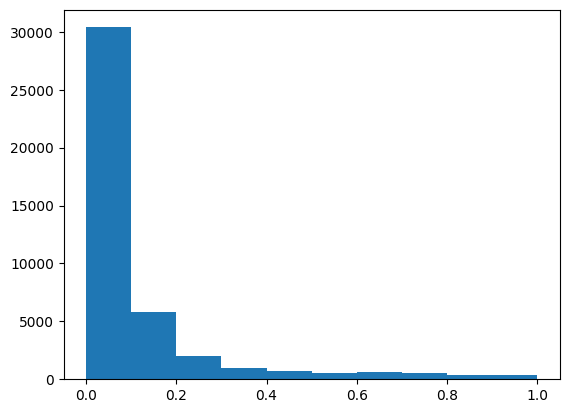

In [148]:
plt.hist(df['target_predicho'])

In [149]:
df[['target','target_predicho','target_predicho_dic','ID']].sample(10)

,target,target_predicho,target_predicho_dic,ID
36661,no,0.070921,False,36662
33325,no,0.056180,False,33326
26726,no,0.032154,False,26727
29328,no,0.008599,False,29329
22177,no,0.039354,False,22178
13926,no,0.087462,False,13927
13411,si,0.054171,False,13412
11788,no,0.113482,False,11789
29202,no,0.047742,False,29203
32780,no,0.033526,False,32781


In [150]:
saldo_5000 = df[['target','target_predicho','target_predicho_dic','ID']]

In [151]:
saldo_5000 = df['saldo'] >= 5000
saldo_5000.value_counts()

saldo
False    39801
True      2645
Name: count, dtype: int64

## MODELO PREDICTIVO CON 'DATA_TEST'

In [152]:
og_test = pd.read_csv('Data_Test.csv', sep = ';')
df_test = og_test.copy()

In [153]:
df_test.dropna(subset=['educacion'], inplace=True)

df_test.isnull().sum()

ID                                  0
edad                                0
trabajo                             0
estado_civil                        0
educacion                           0
deuda                               0
saldo                               0
vivienda                            0
prestamo                            0
tipo_contacto                    1233
duracion                            0
fecha_contacto                      0
campaign                            0
tiempo_transcurrido                 0
contactos_anteriores                0
resultado_campanas_anteriores    3494
target                              0
dtype: int64

In [154]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df_test[['tipo_contacto', 'resultado_campanas_anteriores']] = df_test[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df_test.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [155]:
df_test_model = df_test.copy()
df_test_model.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
817,50818,32,unemployed,soltero,universitarios,no,336,si,no,Sin Información,139,8-may-2021,1,-1,0,Sin Información,no
536,50537,32,management,casado,universitarios,no,62,si,no,movil,166,14-may-2021,1,-1,0,Sin Información,no
2715,52716,40,technician,casado,secundaria/superiores,no,169,si,no,movil,43,18-aug-2021,4,-1,0,Sin Información,no


In [156]:
df_test_model.loc[df_test_model['target'] == 'no', 'target'] = 0
df_test_model.loc[df_test_model['target'] == 'si', 'target'] = 1
df_test_model['target'] = df_test_model['target'].astype(int)

In [157]:
df.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
18763,18764,54,admin.,casado,secundaria/superiores,no,1335,si,no,movil,448,24-jul-2021,1,-1,0,Sin Información,no,0.146123,False
12829,12830,36,services,soltero,priamaria,no,58,si,no,Sin Información,134,6-may-2021,1,-1,0,Sin Información,no,0.012371,False
35648,35649,59,retired,casado,secundaria/superiores,no,5706,si,no,movil,471,25-jul-2021,2,-1,0,Sin Información,no,0.208151,False
15497,15498,32,blue-collar,soltero,secundaria/superiores,no,-219,si,no,movil,446,7-may-2021,6,342,2,sin_exito,no,0.108149,False
1192,1193,41,admin.,casado,priamaria,no,4488,si,no,movil,321,9-jul-2021,1,-1,0,Sin Información,no,0.082579,False


In [158]:
df_test.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
3448,53449,44,technician,divorciado,secundaria/superiores,no,0,no,no,movil,56,12-aug-2021,2,-1,0,Sin Información,no
1350,51351,43,management,casado,priamria,no,8167,si,no,Sin Información,114,19-may-2021,2,-1,0,Sin Información,no
351,50352,50,blue-collar,casado,priamria,no,4108,si,no,movil,526,7-aug-2021,2,-1,0,Sin Información,si
3268,53269,40,management,soltero,secundaria/superiores,no,192,si,no,Sin Información,71,16-may-2021,11,-1,0,Sin Información,no
1792,51793,53,entrepreneur,casado,priamria,no,27,si,no,fijo,230,10-sep-2021,3,-1,0,Sin Información,si


In [159]:
# Reemplaza el valor erróneo en la columna 'educacion'
df_test_model['educacion'] = df_test_model['educacion'].replace('priamaria', 'primaria')


In [160]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df_test['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    2271
universitarios           1318
priamria                  666
Name: count, dtype: int64


In [161]:
columns_to_delete = ['fecha_contacto', 'ID']
df_test_model.drop(columns=columns_to_delete,inplace=True)

df_test_model.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
1620,57,retired,casado,secundaria/superiores,no,523,no,si,movil,49,6,-1,0,Sin Información,0
3232,33,management,soltero,universitarios,no,71,no,no,movil,107,6,-1,0,Sin Información,0
1987,37,blue-collar,soltero,secundaria/superiores,no,48,no,no,movil,140,2,-1,0,Sin Información,0


In [162]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_test_model[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_test_model[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_test_model.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_test_model=pd.concat([df_test_model,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_test_model.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_test_model.shape)
df_test_model.sample(5)

(4255, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
2622,71,2850,185,1,-1,0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3149,28,2269,331,1,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3171,38,1198,63,1,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4198,39,4143,21,1,-1,0,0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4008,52,-9,123,1,-1,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [163]:
X_base_datos_test = df_test_model.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

X_base_datos_std_test=estandarizador.fit_transform(X_base_datos_test)


# Realiza la predicción utilizando el modelo previamente entrenado

y_pred_base_datos_test = model_std.predict_proba(X_base_datos_std_test)

In [164]:
y_pred_base_datos_test

array([[0.9855587 , 0.0144413 ],
       [0.56476309, 0.43523691],
       [0.9410834 , 0.0589166 ],
       ...,
       [0.93790364, 0.06209636],
       [0.86309974, 0.13690026],
       [0.98692601, 0.01307399]])

In [165]:


# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df_test['target_predicho_test'] = y_pred_base_datos_test[:,1]
df_test['target_predicho_dic_test'] = df_test['target_predicho_test'] > 0.65

df_test.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho_test,target_predicho_dic_test
4093,54094,38,technician,casado,secundaria/superiores,no,994,no,no,Sin Información,119,9-jun-2021,1,-1,0,Sin Información,no,0.023479,False
3873,53874,36,blue-collar,casado,priamria,no,1925,si,no,movil,904,20-apr-2021,2,-1,0,Sin Información,si,0.352985,False
289,50290,54,retired,casado,secundaria/superiores,no,1139,si,no,movil,155,14-may-2021,1,177,7,sin_exito,no,0.101135,False


In [170]:
df_test[['target','target_predicho_test','target_predicho_dic_test','ID']].sample(10)

,target,target_predicho_test,target_predicho_dic_test,ID
2141,si,0.877233,True,52142
314,no,0.050777,False,50315
2917,no,0.015466,False,52918
3272,si,0.881811,True,53273
2964,no,0.006984,False,52965
2583,no,0.026992,False,52584
1424,no,0.015912,False,51425
4008,no,0.010768,False,54009
4270,no,0.039696,False,54271
3579,no,0.098310,False,53580


In [167]:
df_test['target_predicho_dic_test'].value_counts()

target_predicho_dic_test
False    4101
True      154
Name: count, dtype: int64

In [186]:
saldo_5000_test = df_test[['target','target_predicho_test','target_predicho_dic_test','ID']]
saldo_5000_test = df_test[df_test['saldo'] >= 5000]

In [189]:
saldo_5000_test

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho_test,target_predicho_dic_test
6,50007,41,admin.,casado,secundaria/superiores,no,5110,si,no,movil,231,13-apr-2021,1,-1,0,Sin Información,no,0.070027,False
20,50021,47,self-employed,divorciado,secundaria/superiores,no,8515,si,no,Sin Información,14,20-nov-2021,7,112,4,otro,no,0.008337,False
45,50046,32,admin.,soltero,secundaria/superiores,no,10218,si,no,movil,149,19-nov-2021,2,-1,0,Sin Información,no,0.068193,False
60,50061,60,retired,casado,priamria,no,71188,no,no,movil,205,6-oct-2021,1,-1,0,Sin Información,no,0.366118,False
63,50064,30,technician,soltero,universitarios,no,6619,si,no,movil,239,21-aug-2021,8,-1,0,Sin Información,no,0.048295,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,54388,38,management,casado,universitarios,no,12877,no,no,Sin Información,118,17-jun-2021,3,-1,0,Sin Información,no,0.029913,False
4393,54394,42,housemaid,casado,priamria,no,14752,no,no,Sin Información,107,19-may-2021,2,-1,0,Sin Información,no,0.016167,False
4397,54398,49,services,casado,secundaria/superiores,no,5673,no,si,movil,357,4-aug-2021,3,-1,0,Sin Información,no,0.081009,False
4400,54401,33,blue-collar,soltero,secundaria/superiores,no,5137,si,no,movil,123,6-may-2021,1,-1,0,Sin Información,no,0.042741,False
